## Heat disease prediction 

In [75]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('heart desease.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

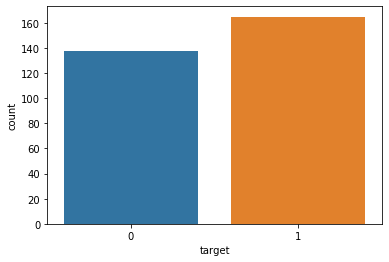

In [9]:
sns.countplot(x='target',data=df)
## From this we can see this is not imbalanced dataset

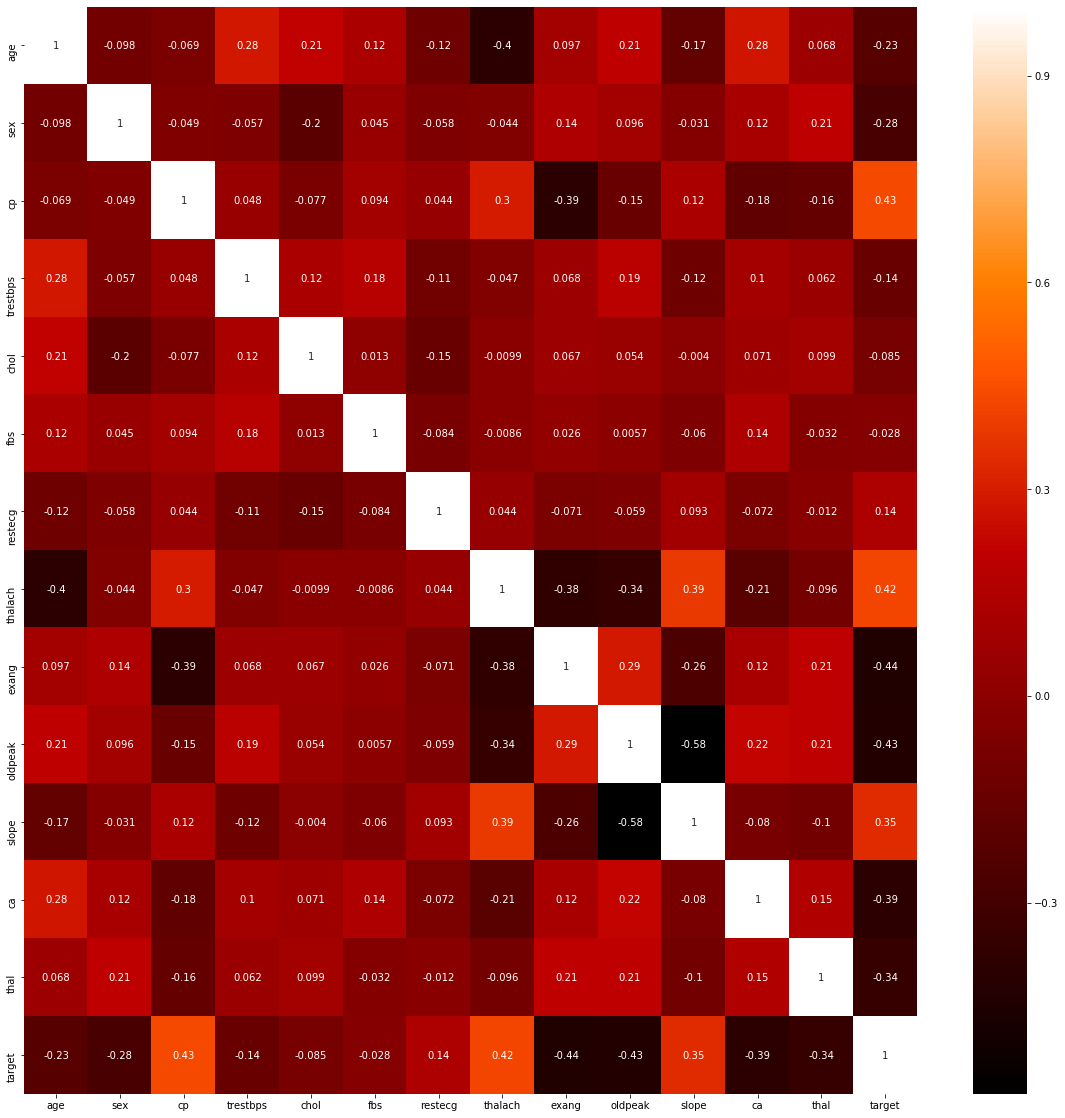

In [65]:
corrmat=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,cmap='gist_heat')

In [26]:
cat=[i for i in df.columns if df[i].dtype== 'O']
len(cat)
# As there is no object type so len is 0

0

In [34]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [36]:
X=df.drop('target',axis=1)
y=df.target

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [79]:
X_train.shape,y_train.shape

((242, 13), (242,))

In [80]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred=Knn.predict(X_test)

In [83]:
error_rate=[]
for i in range(1,40):
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    pred_i=Knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error rate')

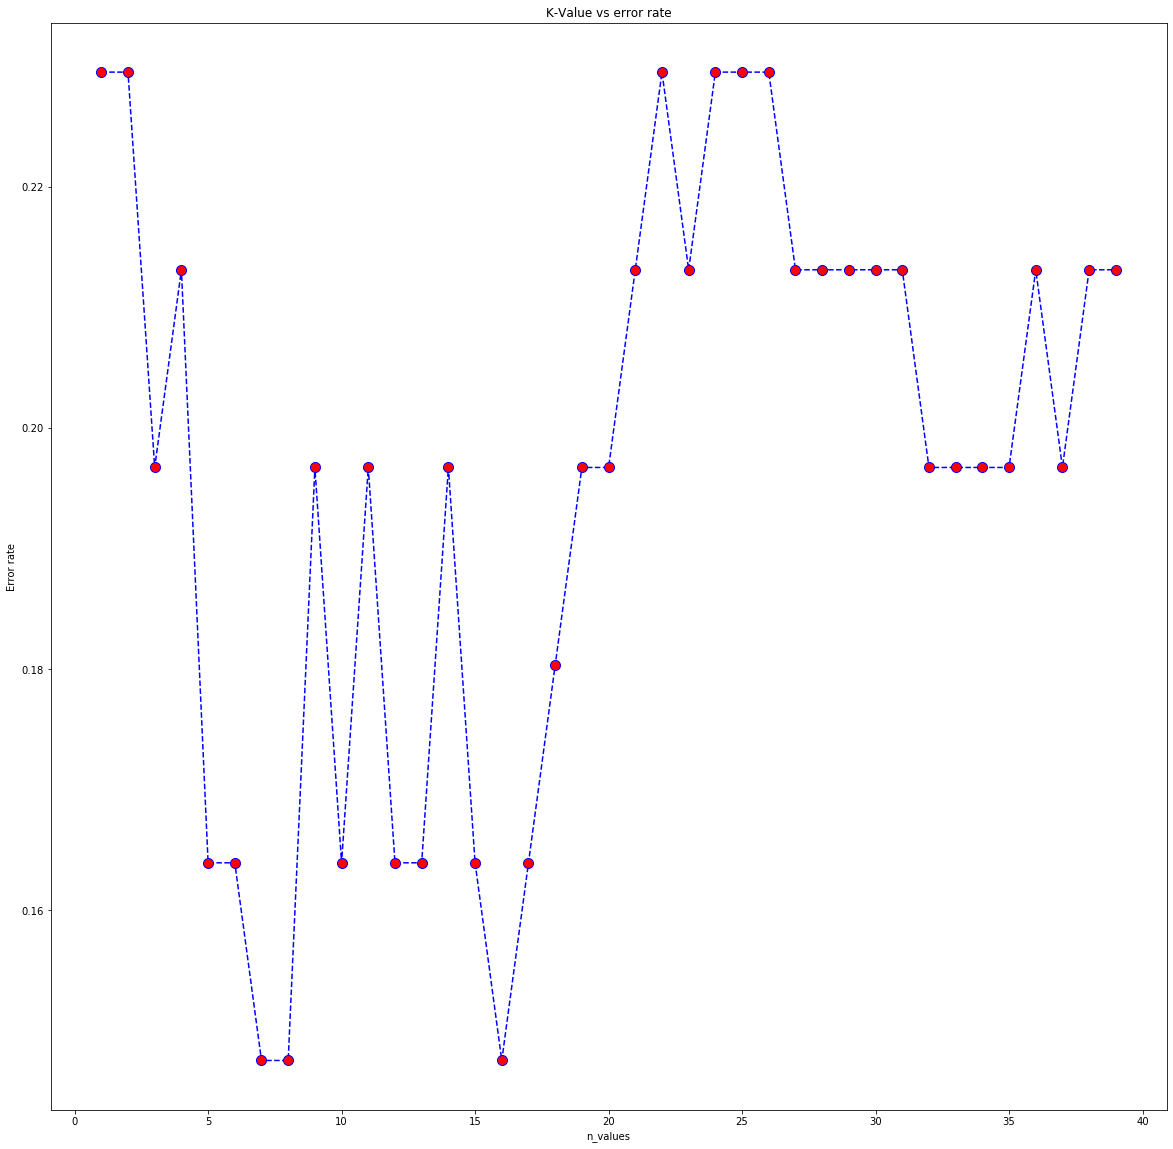

In [88]:
plt.figure(figsize=(20,20))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('K-Value vs error rate')
plt.xlabel('n_values')
plt.ylabel('Error rate')

In [89]:
knn_classifier=KNeighborsClassifier(n_neighbors=16)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8150537634408602

In [90]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Knn,X_train,y_train,cv=10)
score.mean()

0.8055

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
score=cross_val_score(rfc,X,y,cv=10)

In [59]:
score.mean()

0.7953763440860215